In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Social_Network_Ads (1).csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.shape

(400, 5)

In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<AxesSubplot:>

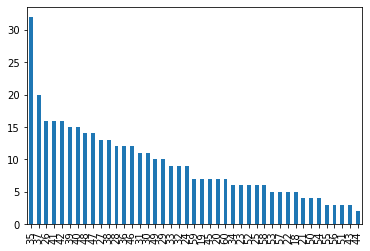

In [11]:
df['Age'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

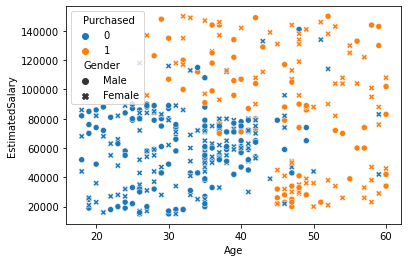

In [12]:
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', style='Gender')

<AxesSubplot:>

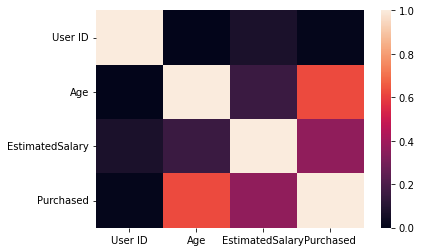

In [13]:
sns.heatmap(df.corr())

In [14]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
df['Gender'] = lr.fit_transform(df['Gender'])
df['Gender'].unique()

array([1, 0])

In [16]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df.loc[:,['Age', 'EstimatedSalary']]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [18]:
df.loc[:,['Age', 'EstimatedSalary']] = sc.fit_transform(df.loc[:,['Age', 'EstimatedSalary']].values)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,-1.781797,-1.490046,0
1,15810944,1,-0.253587,-1.460681,0
2,15668575,0,-1.113206,-0.785290,0
3,15603246,0,-1.017692,-0.374182,0
4,15804002,1,-1.781797,0.183751,0


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,['Gender','Age', 'EstimatedSalary']], df.iloc[:,-1])
print(x_train, x_test)
print(y_train, y_test)

     Gender       Age  EstimatedSalary
274       0  1.847701        -1.284492
356       1  1.561162         0.007561
151       1  0.319491        -0.726560
141       0 -1.877311        -0.051168
270       0  0.510518         1.857547
..      ...       ...              ...
105       1 -1.590771         0.066291
262       0  1.656675         1.622629
98        1 -0.253587         0.095656
31        0 -1.017692         1.975007
249       0 -0.253587         0.800413

[300 rows x 3 columns]      Gender       Age  EstimatedSalary
225       1 -0.062561        -0.491641
171       1 -0.349100         1.328980
111       0 -0.062561         0.036926
257       1  0.223978        -0.374182
194       1 -0.922179         0.565494
..      ...       ...              ...
272       1  2.134241        -0.814655
20        1  0.701544        -1.401952
139       1 -1.781797        -1.313857
263       0 -0.253587         0.066291
299       1  0.797057         1.387710

[100 rows x 3 columns]
274    1
356    

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [22]:
prediction = lr.predict(x_test)
predictionData = {"Prediction":prediction, "Actual":y_test}
predictionData = pd.DataFrame(predictionData)
predictionData.sample(10)

,Prediction,Actual
38,0,0
118,0,0
55,0,0
214,1,0
197,0,0
111,0,0
216,1,0
241,0,0
112,0,0
283,1,1


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [30]:
confusion_matrix(y_test.values, prediction)

array([[70,  3],
       [ 9, 18]], dtype=int64)

In [31]:
accuracy_score(y_test, prediction)

0.88

In [32]:
precision_score(y_test, prediction)

0.8571428571428571

In [33]:
recall_score(y_test, prediction)

0.6666666666666666

In [34]:
error_rate = 1- accuracy_score(y_test, prediction)
error_rate*100

12.0